

# Project: Investigate a Dataset - No Show Appointments Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I will be running an analysis on a Brazilian medical dataset. This dataset contains over 100,000 appointments and if the patients showed up for their appointments. I am doing an analysis to determine what affects the no show rate of the appointments and to determine what factors can affect weather a patient returns for another appointment. I will be exploring these two questions in my analysis, by examining multiple different variables that I think can affect the no show rate or the return rate. Understanding what variables affect these patterns can help healthcare providers in improving patient engagement and operational efficiency.
### Dataset Description 
This is a dataset that contains information from over 100,000 medical appointments in Brazil. The main focus of this dataset is weather or not people have shown up for their appointments. There are a number of characteristics per patient row of this dataset, including condition type such as diabetes, alcoholism, and hypertension


### Question(s) for Analysis
My first question is what variables affect the no show rate?
My next question is what are the differences between unique and repeat patients?

<a id='wrangling'></a>
## Data Wrangling

Here is where I import all the packages I need

In [2]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I start my inspection by importing the dataset and assigning it to df, and examine the first 10 rows. 

In [3]:
#Examining dataset
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here I examine the info, there are some datatypes that need to be changed that I will handle after inspection.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I use the .describe() function to get further details on the dataset

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check for duplicate rows

In [6]:

df.duplicated().sum() 

0

Check for null values

In [7]:

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning
 

I start by changing the datatypes of schedule day, appointment day, and patient id columns 

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['PatientId'] = df['PatientId'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Here i fix the handicap column name spelling error and add a has disability column to use later in my analysis

In [9]:
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df['HasDisability'] = df['Handicap'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,HasDisability
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Here i fix the negative age number

In [10]:
df['Age'] = df['Age'].replace(-1,1)
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

Here i rename scholarhip to welfare for more clarity

In [11]:
df.rename(columns={'Scholarship':'Welfare'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,HasDisability
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Fix hypertension spelling error

In [12]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,HasDisability
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis



### What variables affect the no show rate?

Here I will be determining what variables affect no show rate. I will be exploring multiple variables in this analysis to determine what affects the no show rate among patients in this dataset.

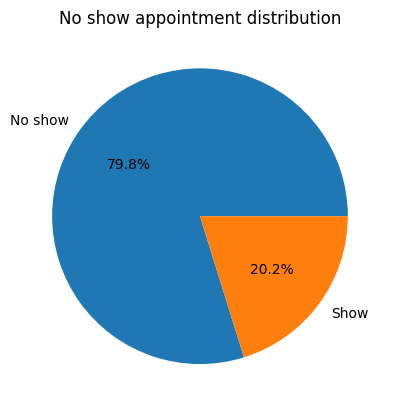

In [20]:
#First i want to start by comparing no show appointment counts to showed appointment counts
df['No-show'].map({'No':'No show', 'Yes':'Show'}).value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('No show appointment distribution')
plt.show()

Here we find that 79.8% of appointments were a no show

In [27]:
#Here i created a dataframe of the sicknesses to find the no show rates for each sickness
def sickness_percent_df():
    #create an array of the sicknesses
    sickness=np.array(['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'])
    #Create a melted dataset
    melted_df = df.melt(id_vars=['No-show'], 
                      value_vars=sickness,
                      var_name='Sickness', 
                      value_name='has_condition')
    
    #grouping by sickness and no show
    result = melted_df[melted_df['has_condition']==1].groupby(['Sickness','No-show']).size().reset_index(name='count')
    
    #create a percentage based off the count column
    result['percentage']=result.groupby('Sickness')['count'].transform(lambda x: (x/x.sum())*100)
    return result
sickness_percent_df()

,Sickness,No-show,count,percentage
0,Alcoholism,No,2683,79.851190
1,Alcoholism,Yes,677,20.148810
2,Diabetes,No,6513,81.996727
3,Diabetes,Yes,1430,18.003273
4,Handicap,No,1676,82.076396
5,Handicap,Yes,366,17.923604
6,Hypertension,No,18029,82.698041
7,Hypertension,Yes,3772,17.301959


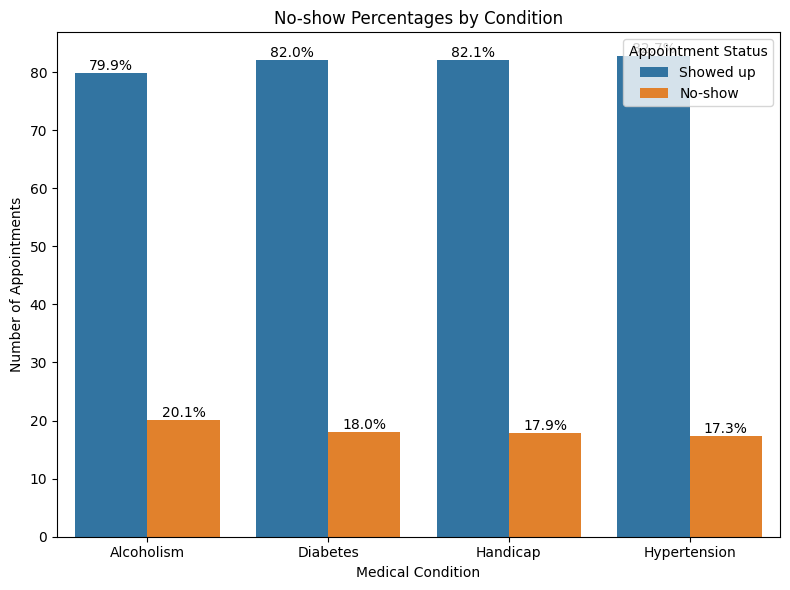

In [15]:
#1 cont.
#Here I create a visualization of the dataframe I created above.

#retrieving the melted data
result = sickness_percent_df()

#giving a clearer label to no show
result['No-show'] = result['No-show'].map({'Yes': 'No-show', 'No': 'Showed up'})

#Creating a percentages column
result['Percentage'] = result.groupby('Sickness')['count'].transform(lambda x: x/x.sum()*100)

#Here i create a bar plot and add the percentages to each column
#I decided to use a bar chart because it makes it easy to compare the proportions of no show rates per sickness
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=result, x='Sickness', y='Percentage', hue='No-show', ax=ax)
for container in ax.containers:
    if len(container) > 0:
        labels = [f'{height.get_height():.1f}%' for height in container]
        ax.bar_label(container, labels=labels)

plt.title('No-show Percentages by Condition')
plt.ylabel('Number of Appointments')
plt.xlabel('Medical Condition')
plt.legend(title='Appointment Status')
plt.tight_layout()
plt.show()

Here i find that patients with alcoholism do not show up to their appointment 20.1 percent of the time, which is higher than every other no show percentage by a 2.1% absolute difference at minimum.

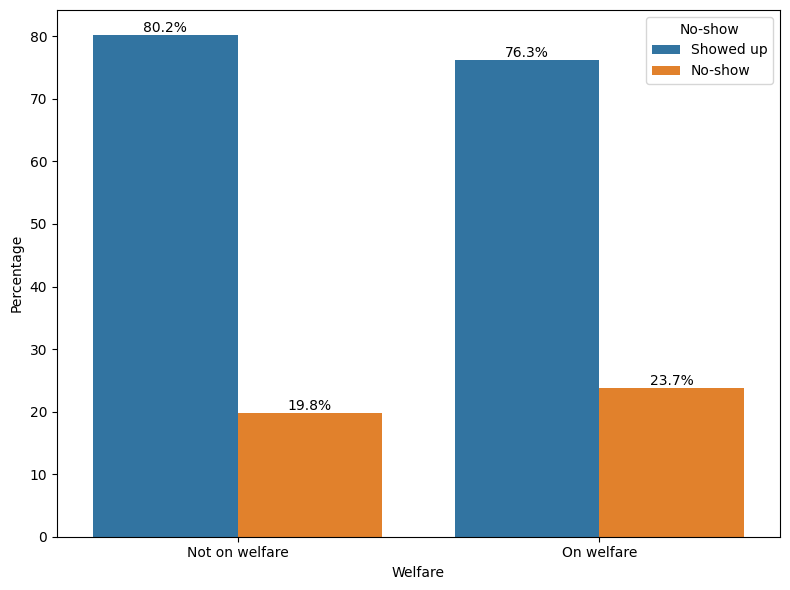

In [16]:
#2
#Here is where I compare no show rates of people on welfare vs people not on welfare 
#I want to examine if people on welfare have a higher or lower no show rate compared to people not on welfare
plt.close('all')

#mapping no show lables to a more clear description
df['No-show'] = df['No-show'].map({'Yes': 'No-show', 'No': 'Showed up'})

#Get counts
counts = df.groupby('Welfare')['No-show'].value_counts().rename('count')

#Converting to dataframe and reseting index
counts_df = counts.reset_index()

#Mapping welfare labels
counts_df['Welfare'] = counts_df['Welfare'].map({1:'On welfare', 0:'Not on welfare'})

#Adding percentage column
counts_df['Percentage'] = counts_df.groupby('Welfare')['count'].transform(lambda x: x/x.sum()*100)

#creating the bar chart
#I used a bar chart because it can show the porportions of each clearly. 
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=counts_df, x='Welfare', y='Percentage', hue='No-show', ax=ax)
for container in ax.containers:
    if len(container) > 0:
        ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

Here i find that people on welfare do not show up for their appointment 23.7% of the time. People who are not on welfare do not show up for their appointment only 19.8% of the time, a 3.9% absolute difference between both categories.

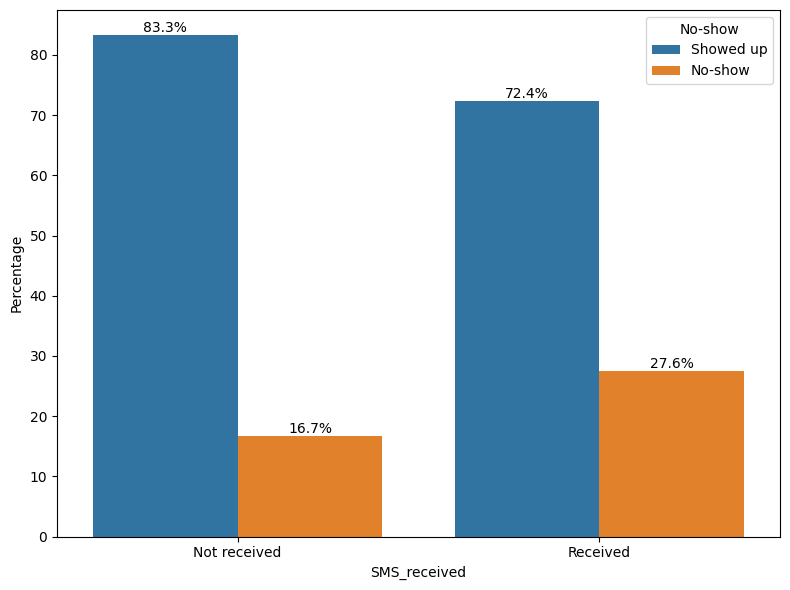

In [17]:
#3 
#Here I compare SMS recieved no shows to SMS not recieved
#I want to examine if a patient recieves an SMS message, they would be more likely to show up. 
#I used a bar chart because it can direclty compare the no show rates of each group clearly.
sms_counts = df.groupby('SMS_received')['No-show'].value_counts().rename('count')
sms_counts_df = sms_counts.reset_index()
sms_counts_df['SMS_received'] = sms_counts_df['SMS_received'].map({1:'Received', 0:'Not received'})
sms_counts_df['Percentage'] = sms_counts_df.groupby('SMS_received')['count'].transform(lambda x: x/x.sum()*100)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=sms_counts_df, x='SMS_received', y='Percentage', hue='No-show', ax=ax)
for container in ax.containers:
    if len(container) > 0:
        ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


There is a 10.9% absolute value difference between no show recieved sms and no show not recieved sms with no show recieved sms being at 27.6% and no show not received sms being at 16.7%

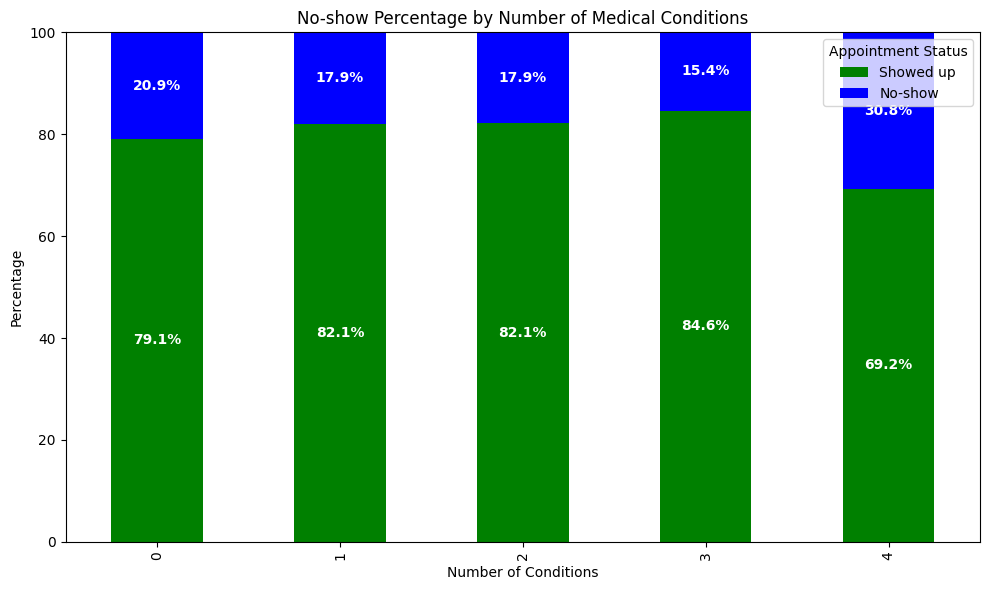

In [18]:
#4
#This compares people with multiple sicknesses no show rates
#I want to examine if a patient with multiple conditions are more or less likely to show up for their appointment

#Here I create a seperate column to count the number of sicknesses a patient has
df['total_sickness'] = df[['Hypertension', 'Diabetes', 'Alcoholism', 'HasDisability']].sum(axis=1)

sickness_counts = df.groupby('total_sickness')['No-show'].value_counts(normalize=True).rename('percent')
sickness_counts_df = sickness_counts.reset_index()
sickness_counts_df['Percentage'] = sickness_counts_df['percent'].transform(lambda x: x * 100)
sickness_counts_df = sickness_counts_df.drop('percent', axis=1)
sickness_counts_df


#I used a stacked bar chart to clearly show the differences in no show rates per number of conditions
pivot_df = sickness_counts_df.pivot(index='total_sickness', columns='No-show', values='Percentage').fillna(0)

ax = pivot_df[['Showed up', 'No-show']].plot(kind='bar', stacked=True, color=['green', 'blue'], figsize=(10, 6))

plt.title('No-show Percentage by Number of Medical Conditions')
plt.xlabel('Number of Conditions')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.legend(title='Appointment Status')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=10, fontweight='bold')
plt.show()

People with 4 conditions miss 30.8% of their appointments, with an absolute value of double the no show rate for people with 3 conditions at 15.4%. 

### Are there any differences between unique and repeat patients?

Here I will be examining the comonalities between unique and repeat patients. First I will be comparing the no show rate between unique patients and repeat patients. After that I will be examining if the number of sicknesses have a relation to the repeat patients.

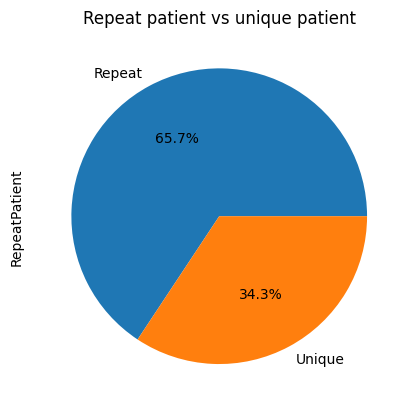

In [22]:
#First, i want to examine the proportion of unique and repeat patients in this 
patient_counts = df['PatientId'].value_counts()
df['RepeatPatient'] = df['PatientId'].map(lambda x: 1 if patient_counts[x] > 1 else 0)

df['RepeatPatient'].map({0: 'Unique', 1:'Repeat'}).value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Repeat patient vs unique patient')
plt.show()

Here we find that 65.7% of patients are repeat patients. 

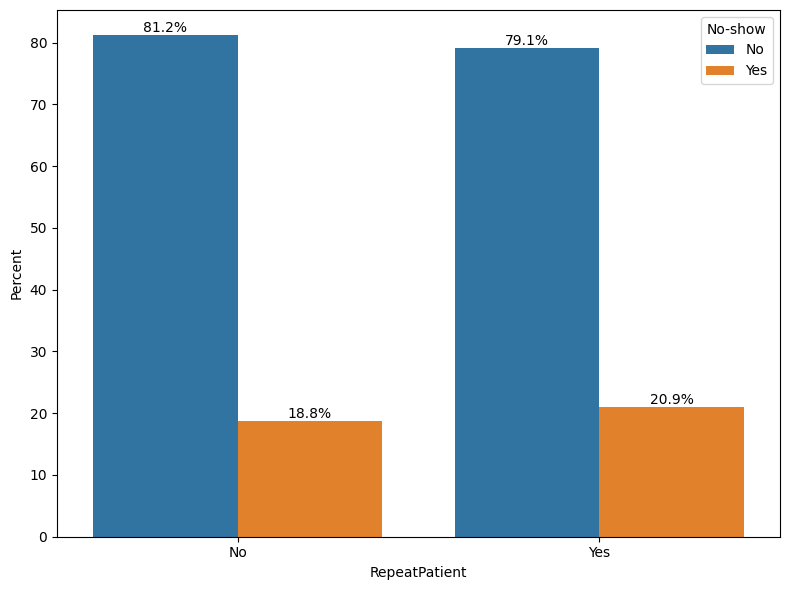

In [21]:
#1
#Here I will be comparing no show rates between unique and repeat patients.
#I am curious to see if repeat patients are more likely to not show up for their appointment

repeat_counts = df.groupby('RepeatPatient')['No-show'].value_counts(normalize=True).rename('Percent')
repeat_counts_df = repeat_counts.reset_index()
repeat_counts_df['Percent'] = repeat_counts_df['Percent'].transform(lambda x: x*100)
repeat_counts_df['RepeatPatient'] = repeat_counts_df['RepeatPatient'].map({1:'Yes', 0:'No'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=repeat_counts_df, x='RepeatPatient', y='Percent', hue='No-show', ax=ax)
for container in ax.containers:
    if len(container) > 0:
        ax.bar_label(container, fmt='%.1f%%')
        
plt.tight_layout()
plt.show()



I find that repeat patients have a no show rate of 20.9% while unique patients have a no show rate of 18.8%, an absolute difference of 2.1%

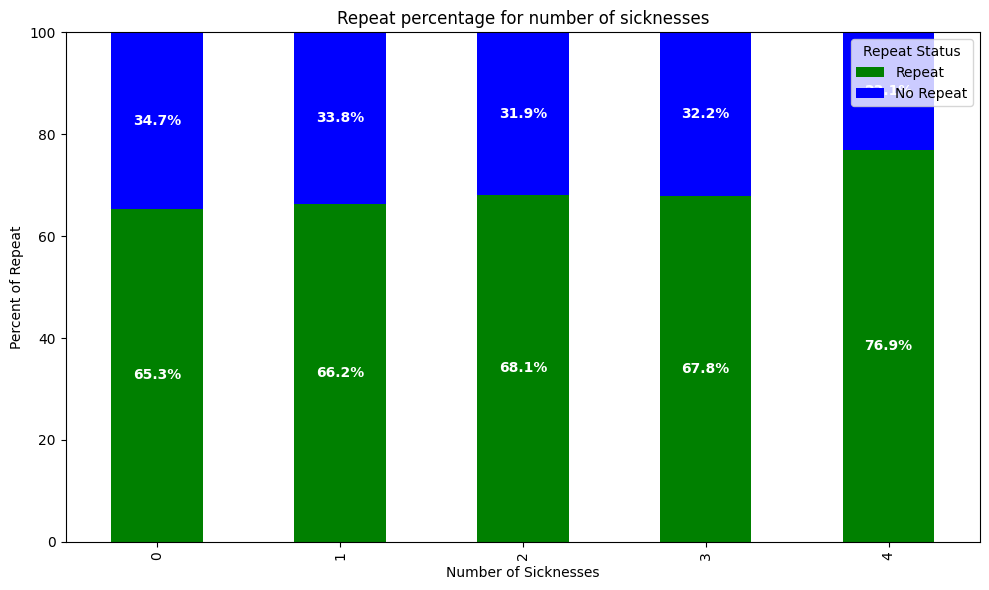

In [20]:
#2
#Compares repeat patients with total sickness.
#I want to see if patients with multiple conditions are more likely to be repeat patients.
total_repeat = df.groupby('total_sickness')['RepeatPatient'].value_counts(normalize=True).rename('Percent')
total_repeat_df = total_repeat.reset_index()
total_repeat_df['RepeatPatient'] = total_repeat_df['RepeatPatient'].map({1:'Repeat', 0:'No Repeat'})
total_repeat_df['Percent'] = total_repeat_df['Percent'].transform(lambda x: x*100)

#I used a stacked bar chart to clearly display the percentages of repeat and unique patients per number of sicknesses
pivot_df = total_repeat_df.pivot(index='total_sickness', columns='RepeatPatient', values='Percent').fillna(0)

pivot_df[['Repeat', 'No Repeat']].plot(kind='bar', stacked=True, color=['green', 'blue'], figsize=(10, 6))

#Add percent labels
for i, (repeat, no_repeat) in enumerate(zip(pivot_df['Repeat'], pivot_df['No Repeat'])):
    plt.text(i, repeat / 2, f'{repeat:.1f}%', ha='center', va='center', color='white', fontweight='bold')  
    plt.text(i, repeat + no_repeat / 2, f'{no_repeat:.1f}%', ha='center', va='center', color='white', fontweight='bold')  

plt.title('Repeat percentage for number of sicknesses')
plt.xlabel('Number of Sicknesses')
plt.ylabel('Percent of Repeat')
plt.ylim(0, 100)
plt.legend(title='Repeat Status')     
plt.tight_layout()
plt.show()

I found that people with 4 sicknesses have the highest percentage of repeat patients, and people with only 1 sickness have the highest percentage of unique patients.  

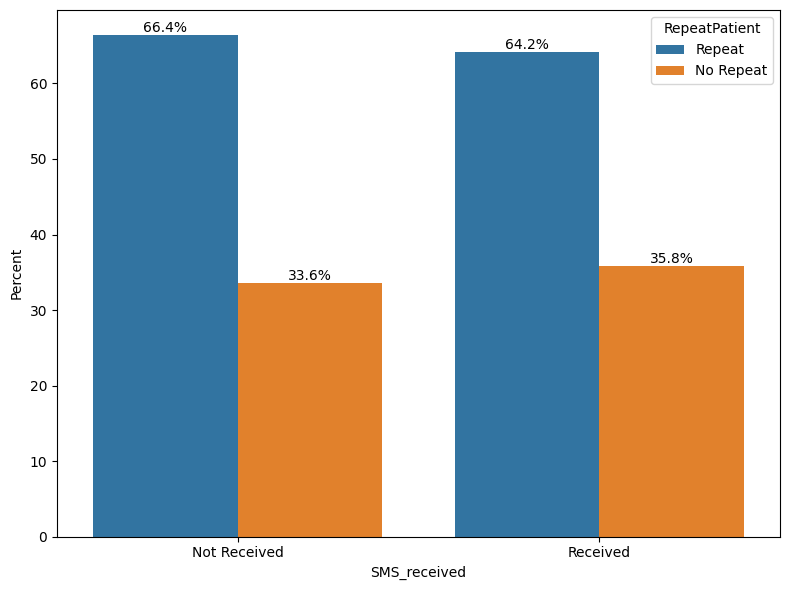

In [21]:
#USE THIS #3
#Compares SMS recieved to repeat patients. 
#I want to examine how SMS affects if a patient returns for care. 
sms_repeat = df.groupby('SMS_received')['RepeatPatient'].value_counts(normalize=True).rename('Percent')
sms_repeat_df = sms_repeat.reset_index()
sms_repeat_df['Percent'] = sms_repeat_df['Percent'].transform(lambda x: x * 100)
sms_repeat_df['SMS_received'] = sms_repeat_df['SMS_received'].map({1:'Received', 0:'Not Received'})
sms_repeat_df['RepeatPatient'] = sms_repeat_df['RepeatPatient'].map({1:'Repeat', 0:'No Repeat'})

#I used a bar chart to directly compare patients who recieved SMS to patients who did not. 
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=sms_repeat_df, x='SMS_received', y='Percent', hue='RepeatPatient', ax=ax)
for container in ax.containers:
    if len(container) > 0:
        ax.bar_label(container, fmt='%.1f%%')
        
plt.tight_layout()
plt.show()


I found that 35.% percent of patients who recieved sms were unique patients, while 33.6% of patients who did not recieve sms were unique patients. 

<a id='conclusions'></a>
## Conclusions

I asked two questions at the beginning of this analysis. My first question is what variables affect the no show rate, and we have explored a few variables that can answer this question. First, we explored the no show percentage for each sickness to determine if there is a higher rate of no shows for a certain sickness. I have determined that alcoholism has the highest no show rate out of the analysis. Alcoholics miss appointments 20.1% of the time, which has an absolute difference at minimum of 2.1% compared to the rest of the sicknesses listed. After that, I compared patients on welfare vs patients not on welfare on their no show rates. I concluded that 23.7% of patients on welfare did not show up for their appointment, compared to 19.8% of patients who are on welfare did not show up for their appointment. Next, I did a comparison between patients who recieved SMS notifications and those who did not and found that 27.6% of patients who recieved an SMS notification did not show up for their appointment, with only 16.7% of patients who did not recieve an SMS notification did not show up for their appointment. Lastly, I compared people with multiple sicknesses no show rates. I concluded that patients with 4 sicknesses have nearly a 15% absolute increase in no show rates compared to patients with 3 conditions, at 30.8% no show rate for patients with 4 conditions. I also concluded that patients with 0 conditions no show about 20.9% of the time, second place from patients with 4 conditions. 

My next question is asking what are the differences between unique and repeat patients. I started by compaing the no show rates between repeat and unique patients. I found there to be a 2.1% absolute difference between unique and repeat patients who did not show up, with repeat patients not showing 20.9% of the time and unique patients not showing 18.8% of the time. Next, I examined how the number of sicknesses the patients have influence the repeat patient percentage. I have concluded that patients with 4 sicknesses are have significantly higher repeat rates, with 76.9% of patients with 4 sicknesses being repeats. Every other sickness number is under 70% repeat rate. Lastly, I compared SMS recieved to repeat patients. I found an absolute difference of 2.2% between unique patients who did and did not recieve SMS, with 35.8% received and 33.6% did not receive.

<a id='conclusions'></a>
## Further Research

This project provides insights to how different variables affect both no show rates and repeat visits. A question that I would ask is why are patients who recieve sms messages about their appointments are more likely to not show up for their appointment. More information about sms messages, such as what the sms says, when it was sent, and which contact method the patients perfer could help answer this question.

<a id='conclusions'></a>
## Limitation
This dataset does not contain information about how patients show up for their appointments. Weather they drive themselves, have a friend/family memeber drive them, take the bus, walk etc. These variables could affect the no show rate for the analysis. 

## Submitting your Project 

In [1]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 692343 bytes to Investigate_a_Dataset.html
